In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
inp0 = pd.read_csv('C:/Users/kallo/OneDrive/Desktop/Upgrad/Casestudy/Case_Study_Notebook/Case_Study_Notebook/googleplaystore_v2.csv')
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
inp0.isnull().sum()
inp1=inp0[~inp0.Rating.isnull()]
inp1.shape
inp1.isnull().sum()
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])
inp1['Current Ver'].isnull().sum()

#After that do a value_counts()
inp1['Current Ver'].value_counts()

<ipython-input-4-8611f23b7412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
6.3.16                   1
10.012                   1
18.30.22                 1
8.1.6                    1
v3.1.1                   1
Name: Current Ver, Length: 2639, dtype: int64

In [5]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

In [7]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [8]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [9]:
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])
inp1['Android Ver'].isnull().sum()

0

In [10]:
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
6.3.16                   1
10.012                   1
18.30.22                 1
8.1.6                    1
v3.1.1                   1
Name: Current Ver, Length: 2638, dtype: int64

In [11]:
inp1.Price = inp1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))

In [12]:
inp1.Price.dtype

dtype('float64')

In [13]:
inp1.Price.value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64>

In [14]:
inp1.Reviews = inp1.Reviews.astype("int32")

In [15]:
inp1.Reviews.dtype

dtype('int32')

In [16]:
inp1.Reviews.describe()
inp1.shape

(9366, 13)

In [17]:
inp1.Installs = inp1.Installs.apply(lambda x: (x[:-1]))

In [18]:
inp1.Installs.describe

<bound method NDFrame.describe of 0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10834           500
10836         5,000
10837           100
10839         1,000
10840    10,000,000
Name: Installs, Length: 9366, dtype: object>

In [19]:
inp1.Installs = inp1.Installs.apply(lambda x: x.replace(',',''))

In [20]:
inp1.Installs = inp1.Installs.apply(lambda x: float(x))

In [21]:
inp1.Installs.describe

<bound method NDFrame.describe of 0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834         500.0
10836        5000.0
10837         100.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9366, dtype: float64>

In [22]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]
inp1.shape

(9359, 13)

In [23]:
inp1[inp1.Reviews <= inp1.Installs]
inp1.shape

(9359, 13)

In [24]:
inp1 = inp1[~((inp1.Type == 'Free') & (inp1.Price >0))]

In [25]:
inp1[(inp1.Type == 'Free') & (inp1.Price >0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
inp1.shape

(9359, 13)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

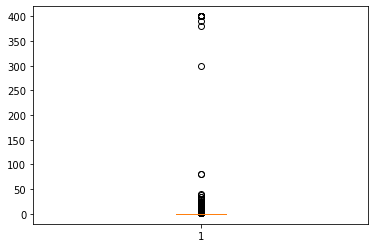

In [28]:
plt.boxplot(inp1.Price)
plt.show()

In [29]:
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [30]:
inp1 = inp1[inp1.Price < 200]

In [31]:
inp1.shape

(9344, 13)

In [32]:
inp1 = inp1[inp1.Price <= 30]

In [33]:
inp1.shape

(9338, 13)

In [34]:
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

In [35]:
###data analysis


In [36]:
import warnings
warnings.filterwarnings("ignore")

<function matplotlib.pyplot.show(close=None, block=None)>

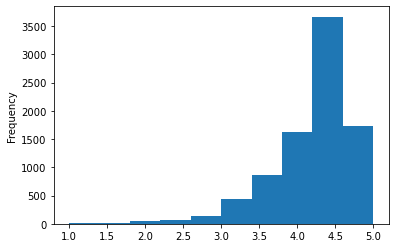

In [37]:
inp1.Rating.plot.hist()
plt.show

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Density', ylabel='Rating'>

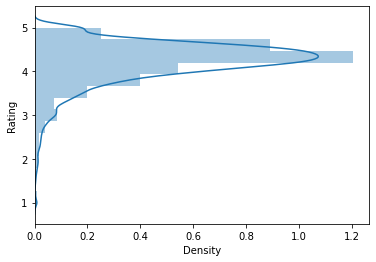

In [39]:
sns.distplot(inp1.Rating, bins = 15, vertical = True)

<AxesSubplot:xlabel='Rating'>

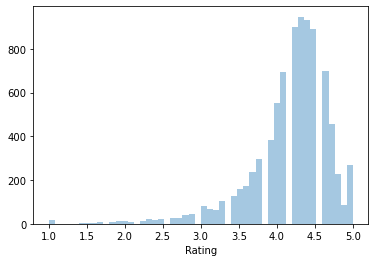

In [40]:


sns.distplot(inp1.Rating,kde = False)

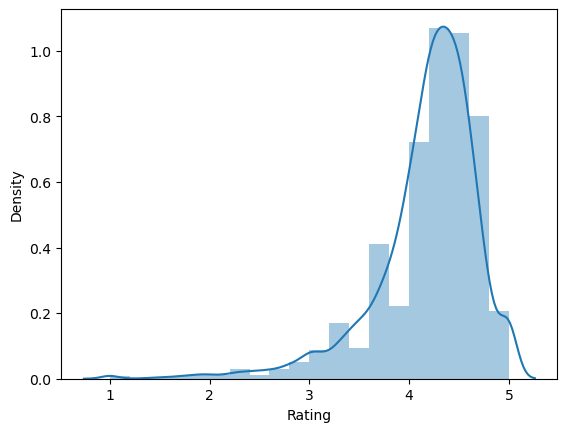

In [41]:
plt.style.use("default")
sns.distplot(inp1.Rating, bins =20)
plt.show()

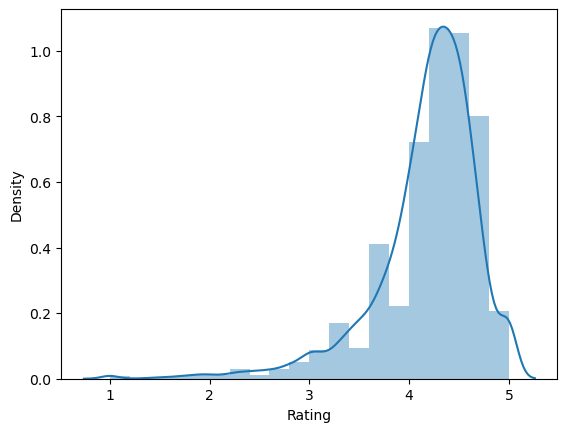

In [42]:
sns.distplot(inp1.Rating, bins =20)
plt.show()

In [43]:
inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [44]:
inp1.shape

(8630, 13)

In [45]:
inp1.reset_index(inplace=True, drop=True)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   float64
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 842.9+ KB


<AxesSubplot:>

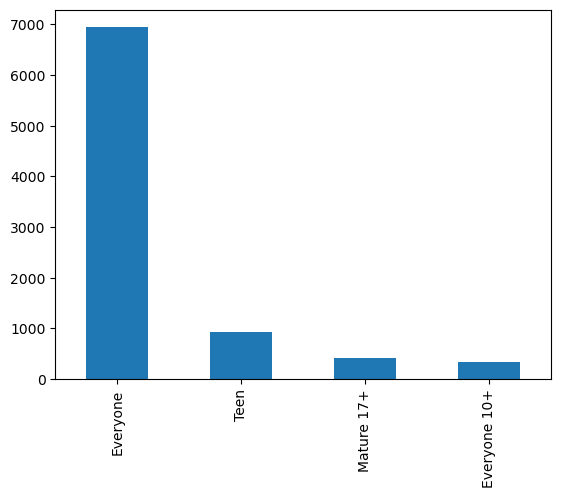

In [50]:
inp1['Content Rating'].value_counts().plot.bar()

<AxesSubplot:>

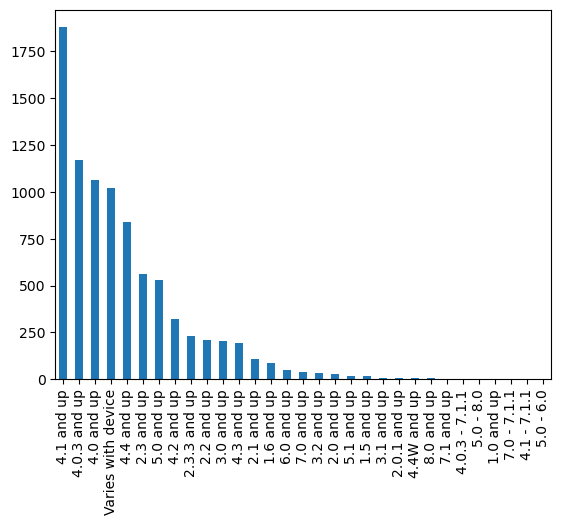

In [51]:
inp1['Android Ver'].value_counts().plot.bar()

(8630, 13)

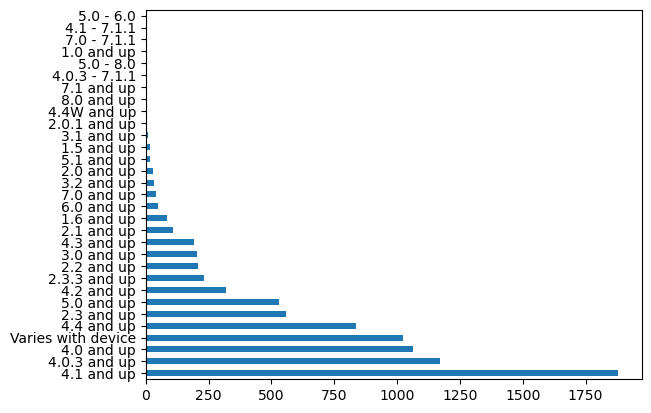

In [55]:
inp1['Android Ver'].value_counts().plot.barh()
inp1.shape

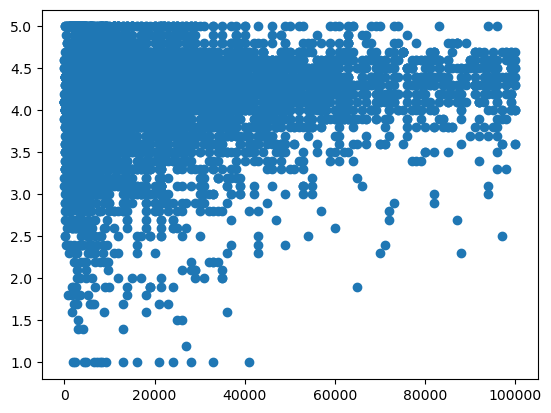

In [56]:
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

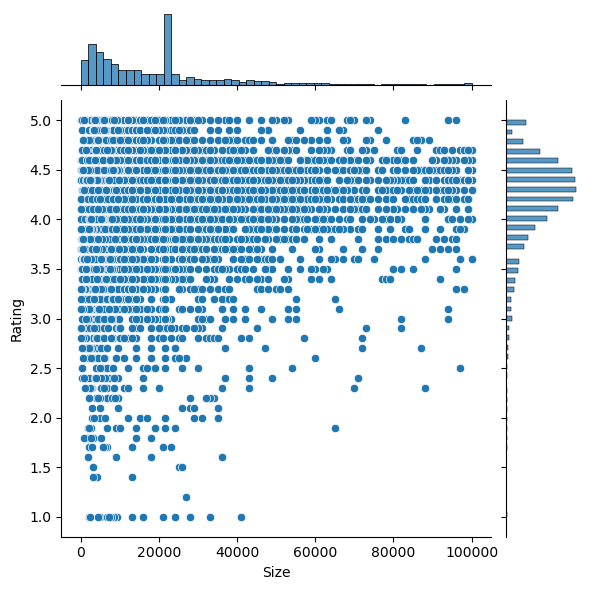

In [69]:
sns.jointplot(inp1.Size, inp1.Rating)

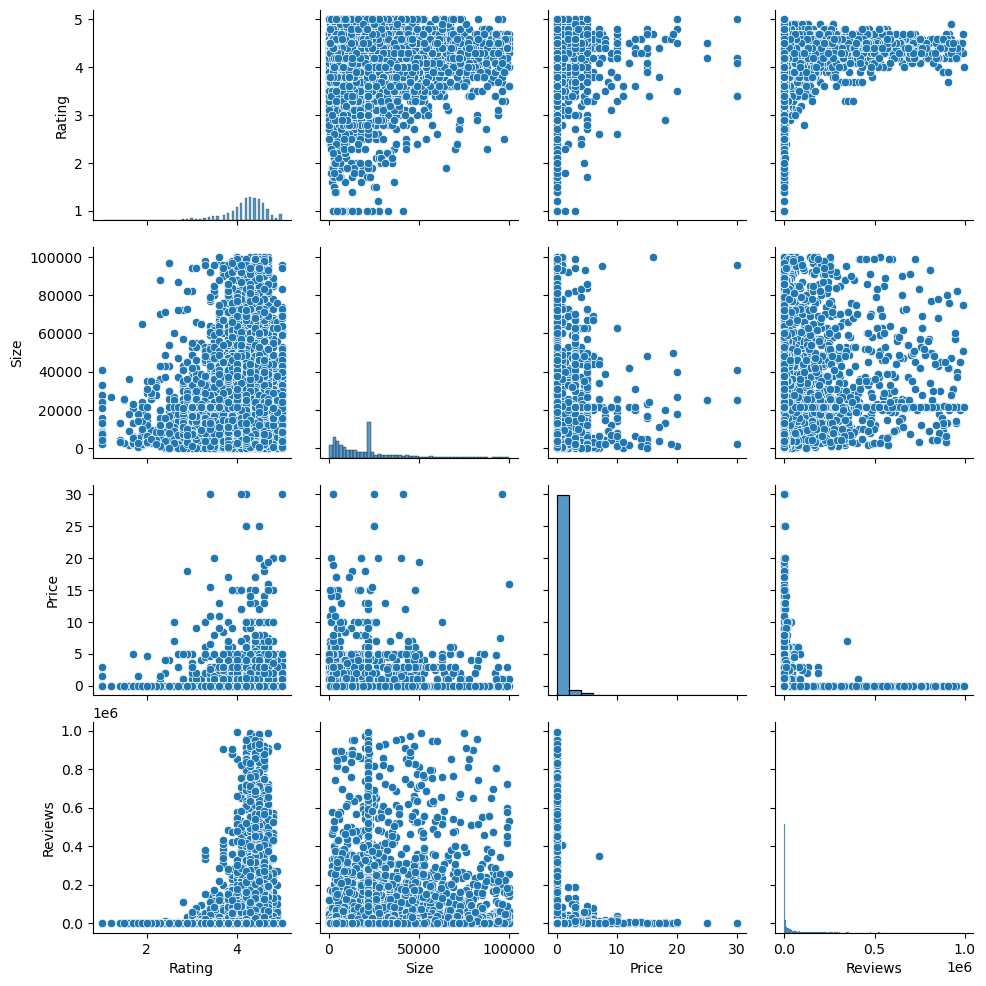

In [71]:
sns.pairplot(inp1[['Rating', 'Size', 'Price', 'Reviews']])
plt.show()

<AxesSubplot:xlabel='Content Rating'>

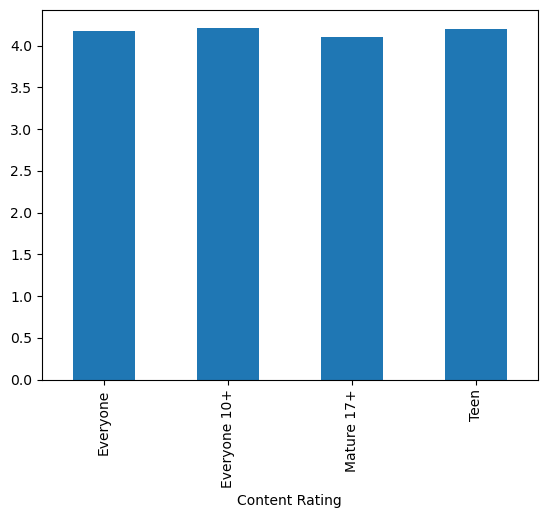

In [72]:
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

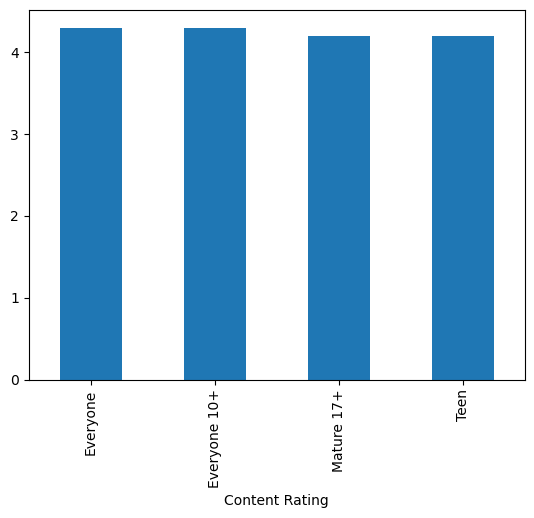

In [73]:
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

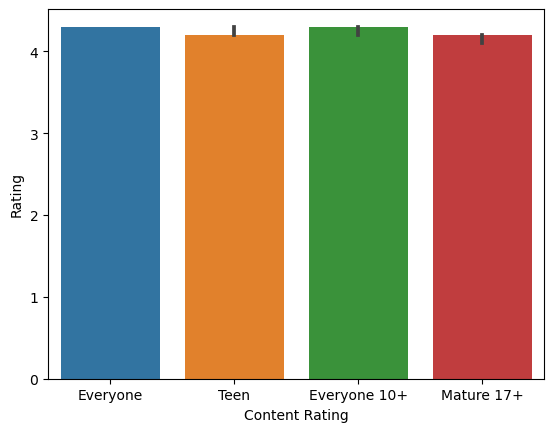

In [74]:
sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=np.median)
plt.show()

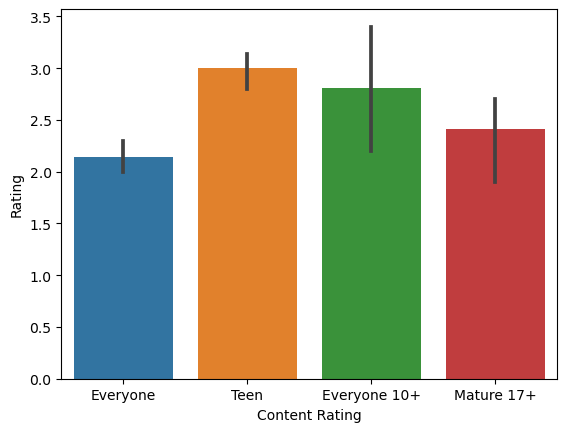

In [75]:
sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=lambda x: np.quantile(x,0.01))
plt.show()

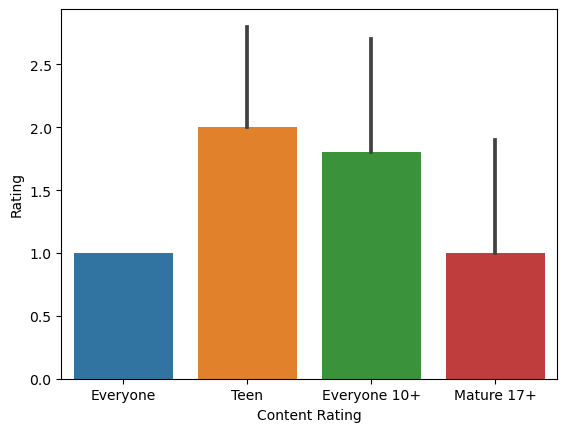

In [76]:
sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator = np.min)
plt.show()

<AxesSubplot:xlabel='Rating'>

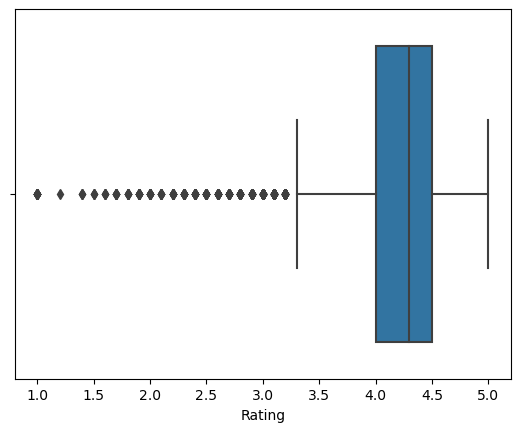

In [77]:
sns.boxplot(inp1.Rating)

In [79]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [80]:
inp1.Genres.value_counts()

Tools                    694
Entertainment            508
Education                464
Medical                  344
Finance                  315
                        ... 
Board;Pretend Play         1
Adventure;Brain Games      1
Puzzle;Education           1
Parenting;Brain Games      1
Lifestyle;Education        1
Name: Genres, Length: 115, dtype: int64

In [85]:
inp2 = inp1[inp1['Genres'].isin(['Tools','Entertainment','Education', 'Medical'])]

<AxesSubplot:xlabel='Genres', ylabel='Rating'>

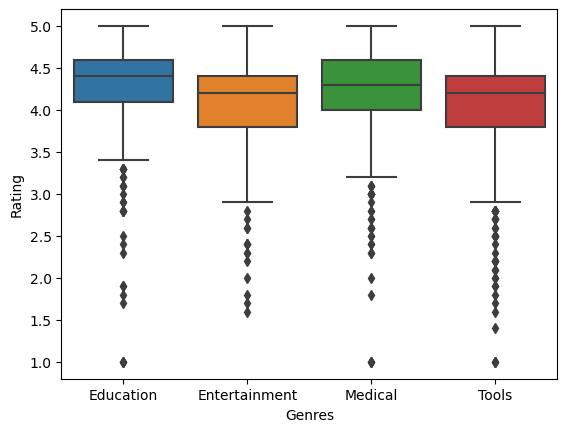

In [87]:
sns.boxplot(inp2.Genres, inp2.Rating)

In [89]:
inp1['Size Bucket']= pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1.0], ['VL', 'L', 'M', 'H', 'VH'])

In [94]:
res = pd.pivot_table(data=inp1, index='Content Rating', columns='Size Bucket', values ='Rating', aggfunc=lambda x:np.quantile(x,0.2))

<AxesSubplot:xlabel='Size Bucket', ylabel='Content Rating'>

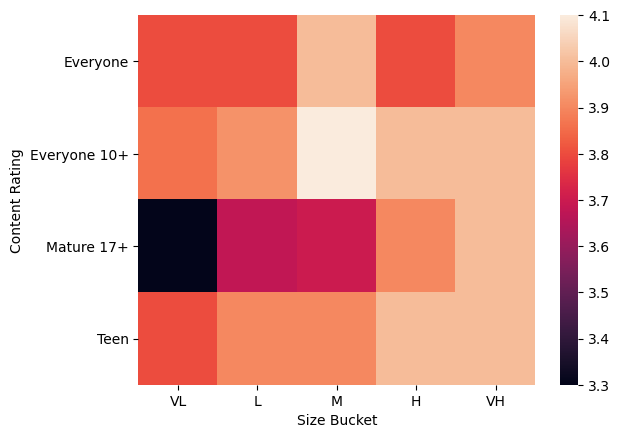

In [96]:
sns.heatmap(res)

<AxesSubplot:xlabel='Size Bucket', ylabel='Content Rating'>

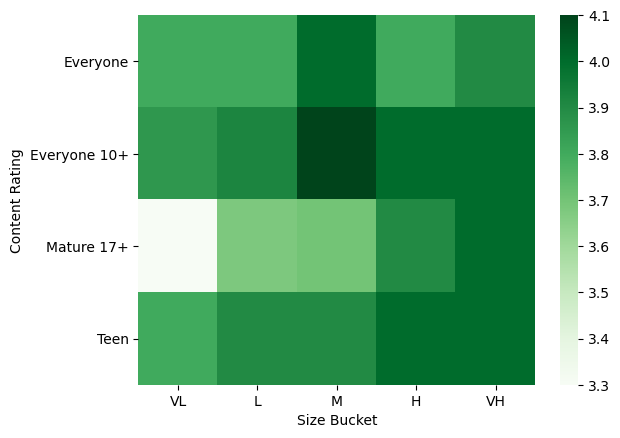

In [98]:
sns.heatmap(res, cmap = 'Greens')